# Simple Linear Regression. Minimal example

### Import the Relevant Libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train it

In [31]:
observations = 1000

xs= np.random.uniform(-10,10,(observations,1))
zs= np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))

print(inputs.shape)
print(xs.shape)
print(zs.shape)

(1000, 2)
(1000, 1)
(1000, 1)


### Create the targets we will aim at

In [32]:
#noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs-3*zs+5
print(targets.shape)

(1000, 1)


### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce

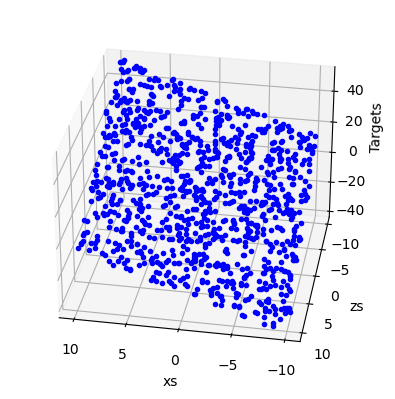

In [33]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)

fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot (xs,zs,targets,'b.')
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)
xs = xs.reshape(observations,1)
zs = zs.reshape(observations,1)

### Initialize variables

In [34]:
init_range=0.1
weights = np.random.uniform(-init_range,init_range,(2,1))
biases = np.random.uniform(-init_range,init_range,1)
print(weights)
print(biases)

[[-0.08724866]
 [ 0.07138379]]
[0.06991957]


### Set a learning rate

In [35]:
learning_rate= 0.02

### Set number of epochs

In [36]:
epochs=1000

### Train the model

In [44]:
weights =[]
loss =[]
for i in range(epochs):
    outputs=np.dot(inputs,weights)+biases
    deltas = outputs-targets
    loss = np.sum(deltas**2)/2/observations
    
    
    print(loss)
    
    deltas_scaled = deltas/observations
    
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    np.append(loss)
    np.append(weights)

ValueError: shapes (1000,2) and (0,) not aligned: 2 (dim 1) != 0 (dim 0)

In [38]:
print(loss)

3.6901432954524336e-17


In [39]:
import pandas as pd
weights=pd.DataFrame(weights)

In [40]:
print(weights)

     0
0  2.0
1 -3.0


ValueError: x and y must have same first dimension, but have shapes (1,) and (2, 1)

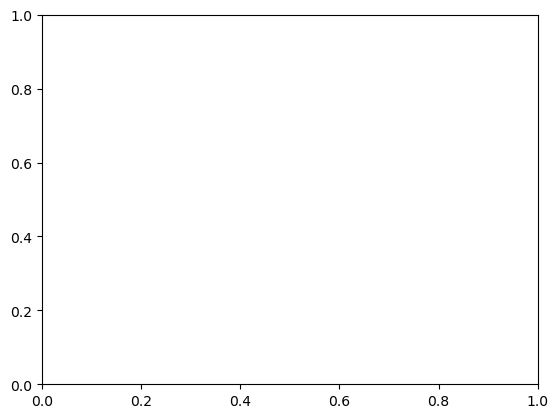

In [41]:
plt.plot(loss,weights)
plt.xlabel('weights')
plt.ylabel('loss')
plt.show()

### Print weights and biases and see if we have worked correctly

In [ ]:
print(weights,biases)

### Plot last outputs vs targets

In [ ]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()